In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime # as dt

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

import pandas_datareader.data as web # this will potentially lead to an error.

from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)

# pdr
# .get_data_yahoo()

In [2]:
gold =\
(
    pdr
    .get_data_yahoo("GDX",
                    start = dt.datetime(2011, 9, 9),
                    end = dt.datetime(2023, 9, 8)
                   )
)

[*********************100%%**********************]  1 of 1 completed


In [3]:
gold["RETURNS"] =\
(np
    .log(gold["Close"] 
         /
         gold["Close"]
         .shift(1)
        )
)

gold["SMA_22"] =\
(
    gold["Close"]
    .rolling(window = 22)
    .mean()
)

In [4]:
gold["distance"] = gold["Close"] - gold["SMA_22"]

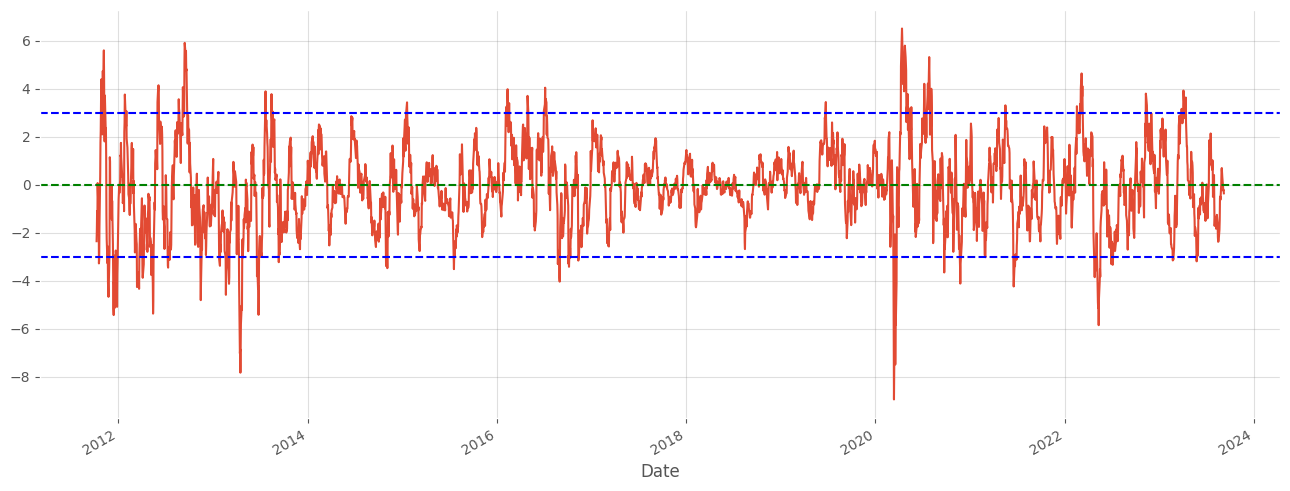

In [5]:
threshold = 3

(gold["distance"]
 .dropna()
 .plot(figsize = [16, 6]
      )
)

plt.axhline(threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "blue", ls = "--")

In [6]:
col         = 'distance'
threshold = 3.0
conditions  = [ gold[col] >= threshold, gold[col] * gold[col].shift(1) < 0, gold[col] <= -threshold ]
choices     = [ -1, 0, 1 ]
    
gold['trading_positions'] = np.select(conditions, choices, np.nan)


In [7]:
gold

,Open,High,Low,Close,Adj Close,Volume,RETURNS,SMA_22,distance,trading_positions
Date,,,,,,,,,,
2011-09-09,65.989998,66.980003,65.309998,65.800003,59.527866,14665800,NaN,NaN,NaN,NaN
2011-09-12,64.750000,65.599998,62.340000,63.900002,57.808975,18843400,-0.029300,NaN,NaN,NaN
2011-09-13,63.990002,64.750000,62.880001,64.389999,58.252262,10438400,0.007639,NaN,NaN,NaN
2011-09-14,64.269997,64.309998,63.000000,63.169998,57.148552,11954300,-0.019129,NaN,NaN,NaN
2011-09-15,62.650002,62.900002,61.349998,62.799999,56.813828,14250700,-0.005874,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-31,29.520000,29.629999,29.040001,29.260000,29.260000,16439500,-0.008847,28.778636,0.481364,NaN
2023-09-01,29.660000,29.850000,29.059999,29.090000,29.090000,20820200,-0.005827,28.770000,0.320000,NaN
2023-09-05,28.820000,29.030001,28.370001,28.490000,28.490000,19547900,-0.020841,28.734091,-0.244091,0.0


In [8]:
gold["trading_positions"] =\
    (gold["trading_positions"]
     .ffill()
    )

<Axes: xlabel='Date'>

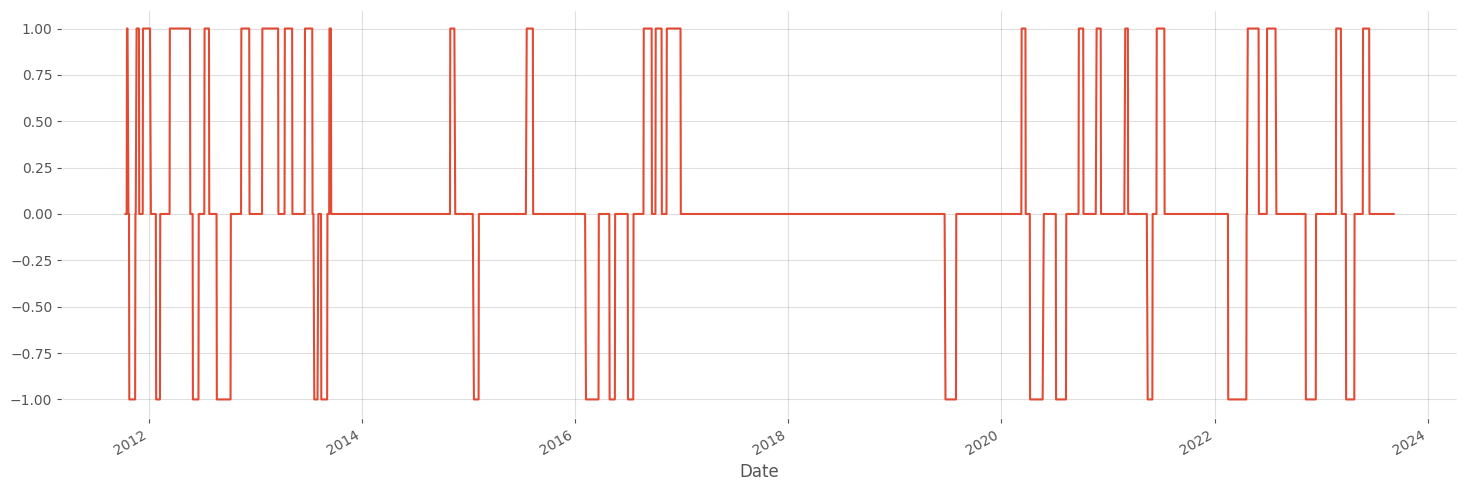

In [9]:
(
    gold["trading_positions"]
    .iloc[22: ]
    .plot(figsize = [18, 6],
          ylim = [-1.10, 1.10]
         )
)

In [10]:
gold["STRATEGY"] =\
    (
    gold
    ["trading_positions"]
    .shift(1)
    *
    gold["RETURNS"]
    )

<Axes: xlabel='Date'>

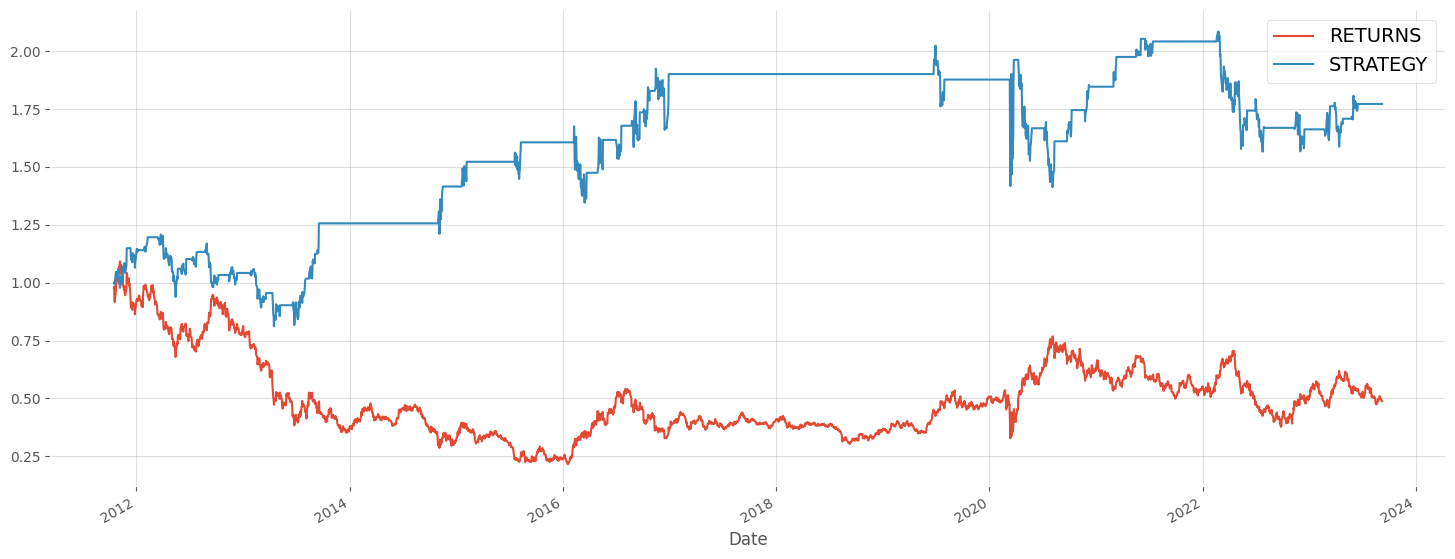

In [11]:
(
    gold
    [["RETURNS", "STRATEGY"]]
    .dropna()
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [18, 7]
         )
)